# Bonus Challenge: Spiral Data Classification

Now that you completed Challenge 2, you know you can use the Tensorflow Playground to experiment the hyperparameters of your deep learning model. If you are brave enough to take on this challenge, we present you the spiral data generated by codes and you will replicate your model built visually in the Tensorflow Playground with Python codes.

Below are the codes to generate the spiral dataset. Read the remarks and execute the codes.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from math import hypot, cos, sin
import numpy as np
import pandas as pd

"""
A function to generate X/Y data points that will form a spiral.
"""
def spiral(radius, step, resolution=.1, angle=0.0, start=0.0):
    dist = start
    coords=[]
    while dist*hypot(cos(angle),sin(angle))<radius:
        cord=[]
        cord.append(dist*cos(angle))
        cord.append(dist*sin(angle))
        coords.append(cord)
        dist+=step
        angle+=resolution
    return coords

In [3]:
# Generate two sets of spiral data points with opposite angles
data_1 = np.array(spiral(1000, 5, angle=0))
data_2 = np.array(spiral(1000, 5, angle=180))

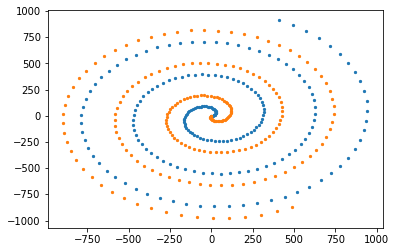

In [4]:
# Plot the two datasets to visualize the spirals

import matplotlib.pyplot as plt

a, b = data_1.T
plt.scatter(a, b, s=5)

aa, bb = data_2.T
plt.scatter(aa, bb, s=5)

plt.show()

In [5]:
# Combine the two spiral datasets into one

df1 = pd.DataFrame(data=data_1, columns=["X", "Y"])
df1["CLASS"] = 0

df2 = pd.DataFrame(data=data_2, columns=["X", "Y"])
df2["CLASS"] = 1

df = df1.append(df2)
df['CLASS'].value_counts()

0    201
1    201
Name: CLASS, dtype: int64

Now, build a neural network with Tensorflow to classify `df`. See how low data loss and how high accuracy can you achieve!

In [6]:
# your code here
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.losses import sparse_categorical_crossentropy
from sklearn.metrics import cohen_kappa_score, classification_report, accuracy_score
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [7]:
df.head()

,X,Y,CLASS
0,0.000000,0.000000,0
1,4.975021,0.499167,0
2,9.800666,1.986693,0
3,14.330047,4.432803,0
4,18.421220,7.788367,0


In [8]:
X = df.drop(['CLASS'], axis=1)
y = df['CLASS']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

print(X_train.shape)
print(X_test.shape)


(321, 2)
(81, 2)


In [17]:
from sklearn.preprocessing import StandardScaler

transformer = StandardScaler()
transformer.fit(X_train)

X_train_tr = transformer.transform(X_train)
X_test_tr  = transformer.transform(X_test)

X_train = pd.DataFrame(X_train_tr, columns=X_train.columns)
X_test = pd.DataFrame(X_test_tr,  columns=X_test.columns)


In [59]:
model = keras.Sequential()

model.add(Dense(units=2, input_dim=X_train.shape[1], activation='LeakyReLU'))

model.add(Dense(units=8, activation='LeakyReLU'))

model.add(Dense(units=8, activation='LeakyReLU'))

model.add(Dense(units=8, activation='LeakyReLU'))

model.add(Dense(1, activation='sigmoid', ))

model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.01),
              loss='binary_crossentropy', 
              metrics=['accuracy']) 
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_56 (Dense)            (None, 2)                 6         
                                                                 
 dense_57 (Dense)            (None, 8)                 24        
                                                                 
 dense_58 (Dense)            (None, 8)                 72        
                                                                 
 dense_59 (Dense)            (None, 8)                 72        
                                                                 
 dense_60 (Dense)            (None, 1)                 9         
                                                                 
Total params: 183
Trainable params: 183
Non-trainable params: 0
_________________________________________________________________


In [60]:
early_stopping = EarlyStopping(patience=2000) 
history = model.fit(X_train, y_train, epochs=2000, validation_split=0.50, batch_size=10, callbacks=[early_stopping])

Epoch 1/2000
16/16 [==============================] - 1s 23ms/step - loss: 0.6973 - accuracy: 0.5063 - val_loss: 0.7003 - val_accuracy: 0.5217
Epoch 2/2000
16/16 [==============================] - 0s 8ms/step - loss: 0.6899 - accuracy: 0.5500 - val_loss: 0.7016 - val_accuracy: 0.5093
Epoch 3/2000
16/16 [==============================] - 0s 9ms/step - loss: 0.6860 - accuracy: 0.5063 - val_loss: 0.7023 - val_accuracy: 0.5528
Epoch 4/2000
16/16 [==============================] - 0s 8ms/step - loss: 0.6864 - accuracy: 0.5375 - val_loss: 0.7057 - val_accuracy: 0.5404
Epoch 5/2000
16/16 [==============================] - 0s 8ms/step - loss: 0.6847 - accuracy: 0.5375 - val_loss: 0.7045 - val_accuracy: 0.5528
Epoch 6/2000
16/16 [==============================] - 0s 8ms/step - loss: 0.6813 - accuracy: 0.5375 - val_loss: 0.7078 - val_accuracy: 0.5280
Epoch 7/2000
16/16 [==============================] - 0s 9ms/step - loss: 0.6849 - accuracy: 0.5750 - val_loss: 0.7065 - val_accuracy: 0.5280
Epoch

In [56]:
model.save('/content/drive/MyDrive/Ironhack/Colab Labs/lab-deep-learning/your-code/models/bonus2.model')

In [23]:
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.tight_layout()
    plt.show()

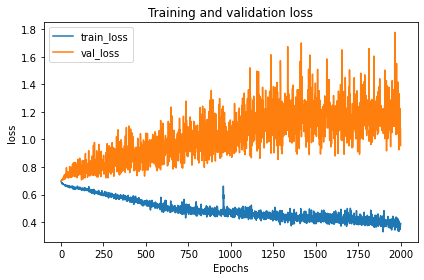

In [61]:
plot_metric(history, 'loss')

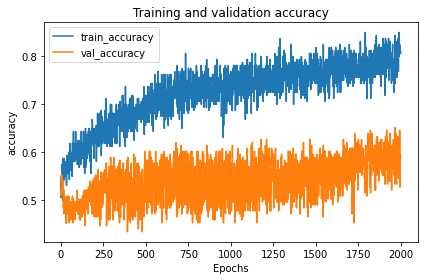

In [62]:
plot_metric(history, 'accuracy')